In [ ]:
import pandas as pd 
import numpy as np
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Choose the country name here:
country = 'Pakistan'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/6962 final project/data/Daily_Precipitation/' + country + '/' + country + '_Precip.csv')
df.drop(df.columns[0],inplace = True,axis=1)
df_test = df.copy()

CCHF_df = pd.read_excel('/content/drive/MyDrive/6962 final project/CCHF - Total ProMED Archive.xlsx')
CCHF_df_test = CCHF_df.copy()

In [ ]:
CCHF_df_test = CCHF_df.copy()
CCHF_df_test['year'] =  CCHF_df_test['issue_date'].apply(lambda x: x.year)
CCHF_df_test['month'] =  CCHF_df_test['issue_date'].apply(lambda x: x.month)

In [ ]:
len(df)

17325900

In [ ]:
df_test['latitude']  = df_test['latitude'].apply(lambda x: np.floor(x).astype(int))
df_test['longitude']  = df_test['longitude'].apply(lambda x: np.floor(x).astype(int))
# df_test.fillna(0,inplace=True)
df_test.reset_index(inplace=True,drop=True)
df_blocks = df_test.groupby(['time','latitude','longitude']).agg({'precip': ['mean']})
df_blocks = df_blocks.droplevel(axis=1,level=1)

In [ ]:
CCHF_df_test = CCHF_df_test[CCHF_df_test['country'] == country]
CCHF_df_test['lat']  = CCHF_df_test['lat'].apply(lambda x: np.floor(x).astype(int))
CCHF_df_test['lon']  = CCHF_df_test['lon'].apply(lambda x: np.floor(x).astype(int))
CCHF_df_test['issue_date'] = CCHF_df_test['issue_date'].apply(lambda x: datetime.datetime(x.year,x.month,x.day))
CCHF_df_test['time'] = CCHF_df_test['issue_date'].apply(lambda x: x.strftime("%m/%d/%Y"))
CCHF_df_test.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# CCHF_df_test = CCHF_df_test.loc[CCHF_df_test['issue_date'].apply(lambda x: x.month > 6)]
# CCHF_df_test = CCHF_df_test.loc[CCHF_df_test['issue_date'].apply(lambda x: x.year > 2000)]

In [ ]:
# Creating an array of names
_time = list(CCHF_df_test.time)
  
# Creating an array of ages
_lat = list(CCHF_df_test.lat)
  
# Creating an array of marks
_lon = list(CCHF_df_test.lon)

CCHF_df_test['multiIndex'] = pd.MultiIndex.from_arrays([_time,_lat,_lon])

In [ ]:
min_lat = min(df_test['latitude'])
min_lon = min(df_test['longitude'])
max_lat = max(df_test['latitude'])
max_lon = max(df_test['longitude'])

In [ ]:
df_test

,latitude,longitude,precip,time
0,24,61,8.752064,11/17/2005
1,24,61,9.820731,11/17/2005
2,24,61,7.429437,11/17/2005
3,24,62,9.321714,11/17/2005
4,24,62,10.138751,11/17/2005
...,...,...,...,...
17325895,35,74,0.061238,11/16/2005
17325896,35,74,0.033681,11/16/2005
17325897,35,74,0.000000,11/16/2005
17325898,35,75,0.000000,11/16/2005


In [ ]:
def fill_precip_na(_df):
  _df = _df.copy()
  _df.fillna(method='ffill',inplace = True)
  _df.fillna(method='bfill',inplace = True)
  return _df

df_blocks = fill_precip_na(df_blocks)

In [ ]:
df_blocks

precip
time       latitude longitude          
05/19/2015 24       61         0.014087
                    62         0.000000
                    63         0.000000
                    64         0.001400
                    65         0.169249
...                                 ...
12/16/2014 35       71         0.003922
                    72         0.129800
                    73         0.018378
                    74         0.032435
                    75         0.167752

[200880 rows x 1 columns]

In [ ]:
df_blocks['target_label'] = pd.Series()
df_blocks.fillna(int(0),inplace = True)
df_blocks['target_label'] = df_blocks['target_label'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
df_blocks

precip  target_label
time       latitude longitude                        
05/19/2015 24       61         0.014087             0
                    62         0.000000             0
                    63         0.000000             0
                    64         0.001400             0
                    65         0.169249             0
...                                 ...           ...
12/16/2014 35       71         0.003922             0
                    72         0.129800             0
                    73         0.018378             0
                    74         0.032435             0
                    75         0.167752             0

[200880 rows x 2 columns]

In [ ]:
for i in range(len(CCHF_df_test)):
  #print(df_blocks.loc[CCHF_df_test.loc[i,'multiIndex']]['target_label'])
  try:
    df_blocks.loc[CCHF_df_test.loc[i,'multiIndex'], ['target_label']] += 1
  except:
    continue
  #print(df_blocks.loc[CCHF_df_test.loc[i,'multiIndex']]['target_label'])
df_blocks['target_label'] = df_blocks['target_label'].astype(int)

In [ ]:
df_blocks.loc[df_blocks['target_label'] != 0 ]

,,,precip,target_label
time,latitude,longitude,,
07/01/2015,29,69,0.528019,1
07/03/2015,29,69,0.102369,1
07/05/2015,29,69,0.278747,1
07/06/2017,28,66,0.663663,2
07/12/2014,29,69,11.474796,1
...,...,...,...,...
12/04/2016,29,69,1.262581,1
12/08/2015,29,69,0.061155,1
12/12/2005,29,69,0.687441,1


In [ ]:
precip = list(df_blocks.loc[df_blocks['target_label'] != 0 ]['precip'])
precip1 = list(df_blocks.loc[df_blocks['precip'] != 0 ]['precip'])

In [ ]:
min(precip),np.percentile(precip, 25),np.percentile(precip, 75), max(precip), np.mean(precip)

(0.0,
 0.031342589571500004,
 0.6322548209884998,
 32.42936652999998,
 1.108490815178092)

In [ ]:
IQR = np.percentile(precip, 75) - np.percentile(precip, 25)
upper_bound = np.percentile(precip, 75) + 1.5*IQR
lower_bound = np.percentile(precip, 25) - 1.5*IQR
print(lower_bound,upper_bound)

-0.8700257575539996 1.5336231681139996


In [ ]:
precip_not_outliers = list()
for i in precip:
  if i < upper_bound and i > lower_bound:
    precip_not_outliers.append(i)

In [ ]:
IQR1 = np.percentile(precip1, 75) - np.percentile(precip1, 25)
upper_bound1 = np.percentile(precip1, 75) + 1.5*IQR
lower_bound1 = np.percentile(precip1, 25) - 1.5*IQR
print(lower_bound1,upper_bound1)

-0.8779183882199441 1.5595677012254996


In [ ]:
precip1_not_outliers = list()
for i in precip1:
  if i < upper_bound1 and i > lower_bound1:
    precip1_not_outliers.append(i)

Text(0.5, 1.0, 'Distribution of Precipitation')

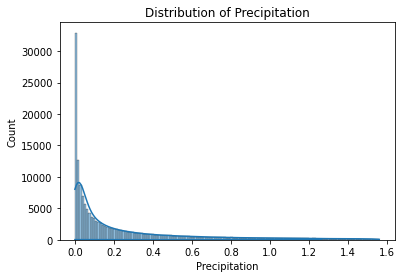

In [ ]:
import seaborn as sns
sns.set_palette(sns.color_palette("tab10"))
p = sns.histplot(precip_not_outliers, kde = True)
p = sns.histplot(precip1_not_outliers, kde = True)
p.set_xlabel("Precipitation", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title('Distribution of Precipitation', fontsize = 12)

Text(0.5, 1.0, 'Distribution of Precipitation on Date of Alerts')

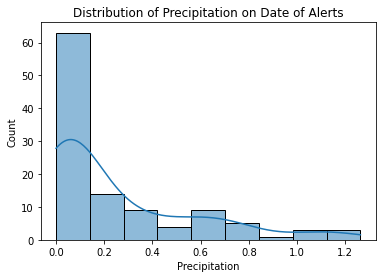

In [ ]:
sns.set_palette(sns.color_palette("tab10"))
p = sns.histplot(precip_not_outliers, kde = True)
p.set_xlabel("Precipitation", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title('Distribution of Precipitation on Date of Alerts', fontsize = 12)

Text(0.5, 0, 'Precipitation')

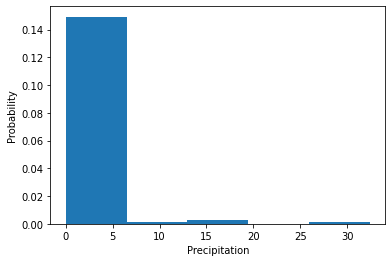

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
x = precip

plt.hist(x, density=True, bins=5)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Precipitation')

In [ ]:
%cd '/content/drive/MyDrive/6962 final project/data/Daily_Precipitation/'


/content/drive/.shortcut-targets-by-id/12pjah520zwJMQos4SHRxl7lFoUlEuU7h/6962 final project/data/Daily_Precipitation


In [ ]:
df_blocks.to_csv(country+'_merged.csv')

In [ ]:
# lon_min, lon_max, lat_min, lat_max = min(df_test.longitude),max(df_test.longitude),min(df_test.latitude),max(df_test.latitude)
# lon_list = list(range(lon_min,lon_max+1))
# lat_list = list(range(lat_min,lat_max+1))

# time_list = list(set(df_test['time']))

# lon_list
# time_list.sort()

# final_time = list()
# final_lat = list()
# final_lon = list()

# for i in time_list:
#   final_time.extend([i]*(len(lat_list) * len(lon_list)))

# for i in lat_list:
#   final_lat.extend([i]*len(lon_list))
# final_lat = final_lat*len(time_list)

# final_lon = lon_list * len(time_list) * len(lat_list)

# # final_lon = lon_list*len(lat_list)

# # lon_list = lon_list * len(lat_list) * len(list(set(df_test['time'])))
# # lat_list = lat_list *len(list(range(lon_min,lon_max+1))) * len(list(set(df_test['time'])))

# len(final_lon), len(final_lat), len(final_time)

# final_blocks = pd.DataFrame({'time':final_time,'lat':final_lat,'lon':final_lon})